# Activity: Explore sampling

## Introduction
In this activity, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from scipy import stats

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [6]:
# RUN THIS CELL TO IMPORT YOUR DATA.
epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

<details>
  <summary><h4>Hint 1</h4></summary>

Use the function in the `pandas` library that allows you to read in data from a csv file and load it into a DataFrame. 

</details>

<details>
  <summary><h4>Hint 2</h4></summary>

Use the `read_csv` function from the pandas `library`. Set the `index_col` parameter to `0` to read in the first column as an index (and to avoid `"Unnamed: 0"` appearing as a column in the resulting Dataframe).

</details>

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [7]:
# First 10 rows of the data
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame. 

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `head` function from the `pandas` library. Set the `n` parameter to `10` to print out the first 10 rows.

</details>

**Question:** What does the `aqi` column represent?

**Answer:**  
The aqi is a metere of air polution from carbon monoxide. Stands for air quality index, and has a range of 0 to 500. The larger the aqi value the less the quality of the air.

### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [10]:
epa_data.describe(include='all').round(2)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.00,260.00
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.40,6.76
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.32,7.06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,2.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28,5.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.52,9.00


<details>
  <summary><h4>Hint 1</h4></summary>

Use function in the `pandas` library that allows you to generate a table of basic descriptive statistics in a DataFrame.

</details>

<details>
  <summary><h4>Hint 2</h4></summary>

Use the `describe` function from the `pandas` library. Set the `include` parameter passed in to this function to 'all' to specify that all columns of the input be included in the output.

</details>

**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

**Answer:**  
The mean value of the aqi column is 6.76

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

**Answer:**  
The count value for the aqi column is 260, as is the ttl index count meaning that we do not have missing values.

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [74]:
population_mean = round(epa_data['aqi'].mean(),2)
population_mean

6.76

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to generate a mean value for a column in a DataFrame.

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` method.

</details>

## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [20]:
sampled_data = epa_data.sample(n=50,replace=True,random_state=42)

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [21]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame. 

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `head` function from the `pandas` library. Set the `n` parameter to `10` to print out the first 10 rows.

</details>

**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

**Answer:**  
The reason we observe duplicated rows is that we generate a sample with replacement. This means that each time the algorithm chooses a certain observation, that observation is not excluded from the possible values for the next selection.

**Question:** What does `random_state` do?

**Answer:**  
The random_state argument of the .sample() method essentially sets a random seed, which serves as a starting point for generating random numbers. By assigning a specific number to this argument, you ensure the reproducibility of the generated random sample. This means that you can retrieve the same observations repeatedly as long as you specify the same seed for the .sample() method.

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [23]:
sampled_mean = sampled_data['aqi'].mean()
round(sampled_mean,2)

5.54

 **Question:**  Why is `sample_mean` different from `population_mean`?


**Answer:**  
The sample mean is usually different from the population mean due to sampling variability.

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [26]:
estimate_list= []
for i in range(10000):
    sample_means = epa_data['aqi'].sample(n=50,replace=True).mean()
    estimate_list.append(sample_means)

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Review [the content about sampling in Python](https://www.coursera.org/learn/the-power-of-statistics/lecture/SNOE0/sampling-distributions-with-python). 

</details>

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [27]:
estimate_df = pd.DataFrame(data={'estimate':estimate_list})
estimate_df.head()

,estimate
0,7.16
1,7.36
2,5.80
3,8.14
4,6.66


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Review [the content about sampling in Python](https://www.coursera.org/learn/the-power-of-statistics/lecture/SNOE0/sampling-distributions-with-python). 

</details>

<details>
<summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` function.

</details>

### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [75]:
mean_sample_means = round(estimate_df['estimate'].mean(),2)
mean_sample_means

6.76

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to generate a mean value for a column in a DataFrame.

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` function.

</details>

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

**Answer:**  
The mean of the sampling distribution of the 10,000 random samples is 6,76

<details>
  <summary><h4><strong> Hint 3 </STRONG></h4></summary>

This value is contained in `mean_sample_means`.

</details>

<details>
  <summary><h4><strong> Hint 4 </STRONG></h4></summary>

According to the central limit theorem, the mean of the preceding sampling distribution should be roughly equal to the population mean. 

</details>

**Question:** How are the central limit theorem and random sampling (with replacement) related?

**Answer:**  
The Central Limit Theorem supports that if the samples are large enough, the mean of the sample distribution of random samples is roughly close to the mean of the population (following the law of large numbers), and the sampling distribution follows a normal distribution curve. The third condition of the theorem is that we need to ensure independence between the drawing of every sample. To achieve this, we need to perform sampling with replacement to ensure that the random selection of one element will not affect the probability of the random selection of the next element.


### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

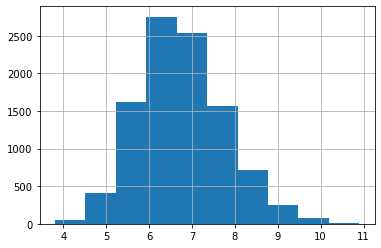

In [32]:
estimate_df['estimate'].hist();

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the `hist()` function. 

</details>

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [94]:
sample_std = sampled_data['aqi'].std()
sample_count = sampled_data['aqi'].count()
sample_se = sample_std / np.sqrt(sample_count)
round(sample_se,2)

0.74

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the `std()` function and the `np.sqrt()` function.

</details>

## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

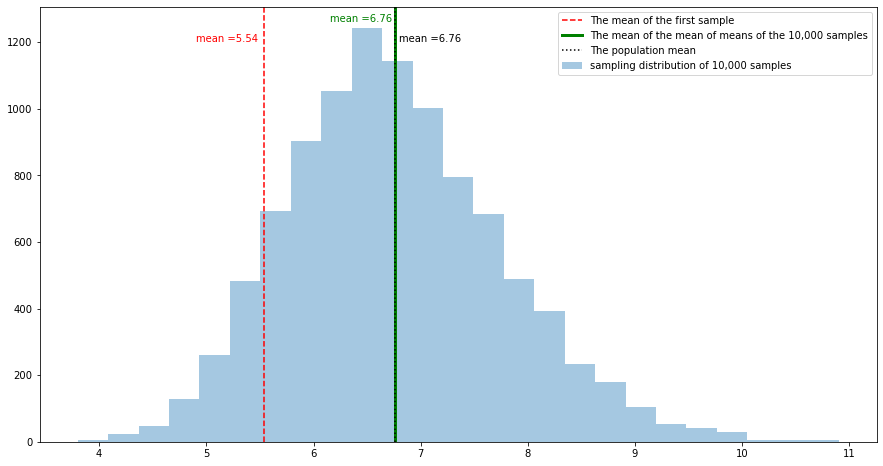

In [95]:
plt.figure(figsize=(15,8))
plt.hist(estimate_df['estimate'],bins = 25,alpha=0.4,label='sampling distribution of 10,000 samples')
plt.axvline(sampled_mean, color='r',linestyle='--',label='The mean of the first sample')
plt.text(4.9,1200,f'mean ={sampled_mean}',color='red')
plt.axvline(mean_sample_means,color = 'g',linestyle='-',lw=3,label='The mean of the mean of means of the 10,000 samples')
plt.text(6.15,1260,f'mean ={mean_sample_means}',color='green')
plt.axvline(population_mean,color = 'black',linestyle=':', label='The population mean')
plt.text(6.8,1200,f'mean ={population_mean}',color='black')
plt.legend()
plt.show()

**Question:** What insights did you gain from the preceding sampling distribution?

**Answer:**  
Observing the histogram of the sampling distribution above, we can see that the Central Limit Theorem has been confirmed. Our sampling distribution follows a normal distribution, and the mean of the sampling distribution is equal to the mean of the population. We can also see that the red line which represents the mean of the first sample is off-center. This is an expected outcome due to sampling variability.

# Considerations
**What are some key takeaways that you learned from this lab?**  
Key takeaways from this lab include practicing the sampling method and confirming the Central Limit Theorem.

**What findings would you share with others?**  
Worth-mentioning highlights include the confirmation that the sampling distribution follows a normal distribution curve and has the same mean as the population.

**What would you convey to external stakeholders?**  
Information that would be useful to external stakeholders is that we have estimated with confidence that the mean value of AQI for the entire population is 6.76.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.